In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\shanmukh\Desktop\Data Science\CSV Files\Placement_Data_Full_Class.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
df.shape

(215, 15)

In [4]:
df.info

<bound method DataFrame.info of      sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0        1      M  67.00   Others  91.00   Others  Commerce     58.00   
1        2      M  79.33  Central  78.33   Others   Science     77.48   
2        3      M  65.00  Central  68.00  Central      Arts     64.00   
3        4      M  56.00  Central  52.00  Central   Science     52.00   
4        5      M  85.80  Central  73.60  Central  Commerce     73.30   
..     ...    ...    ...      ...    ...      ...       ...       ...   
210    211      M  80.60   Others  82.00   Others  Commerce     77.60   
211    212      M  58.00   Others  60.00   Others   Science     72.00   
212    213      M  67.00   Others  67.00   Others  Commerce     73.00   
213    214      F  74.00   Others  66.00   Others  Commerce     58.00   
214    215      M  62.00  Central  58.00   Others   Science     53.00   

      degree_t workex  etest_p specialisation  mba_p      status    salary  
0     Sci&Tech

In [5]:
#Checking the null values
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

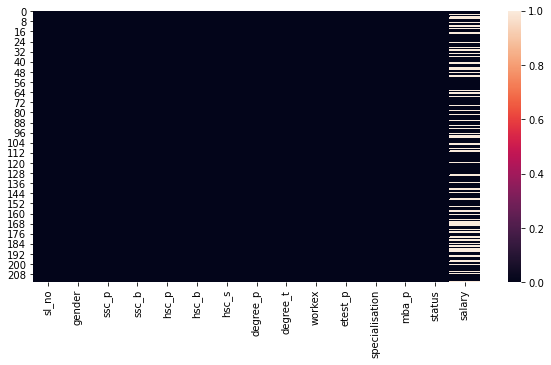

In [6]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull())

In [7]:
df['salary']

0      270000.0
1      200000.0
2      250000.0
3           NaN
4      425000.0
         ...   
210    400000.0
211    275000.0
212    295000.0
213    204000.0
214         NaN
Name: salary, Length: 215, dtype: float64

In [8]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [9]:
df=df.fillna(df.mean())

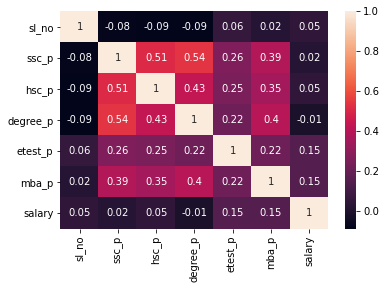

In [10]:
#Checking the correlation
corr=df.corr().round(2)
#plt.figure(figsize=(15,10))
sns.heatmap(data=corr,annot=True)

In [11]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000


In [12]:
#Data Encoding
from sklearn.preprocessing import LabelEncoder

In [13]:
le = LabelEncoder()

In [14]:
df['gender']=le.fit_transform(df['gender']) 
df['ssc_b']=le.fit_transform(df['ssc_b']) 
df['hsc_s']=le.fit_transform(df['hsc_s']) 
df['hsc_b']=le.fit_transform(df['hsc_b']) 
df['degree_t']=le.fit_transform(df['degree_t'])
df['workex']=le.fit_transform(df['workex'])
df['specialisation']=le.fit_transform(df['specialisation'])
df['status']=le.fit_transform(df['status'])


In [37]:
#Scaling data 
from sklearn.preprocessing import StandardScaler

In [38]:
scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.fit_transform(X_test)

In [39]:
# Balanced and Imbalanced data
df['status'].value_counts()

1    148
0     67
Name: status, dtype: int64

In [40]:
X=df.drop('status',axis=1)
y=df['status']

In [41]:
from imblearn.over_sampling import RandomOverSampler
rus = RandomOverSampler(random_state=0)
X_res, y_res =  rus.fit_resample(X, y)

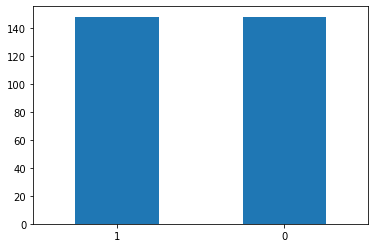

In [42]:
y_res.value_counts().plot(kind = 'bar', rot=0)

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.4,random_state=42)

In [45]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [46]:
#prediction
y_pred = classifier.predict(X_test)
#Accuracy
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))

Accuracy Score: 0.9831932773109243


In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

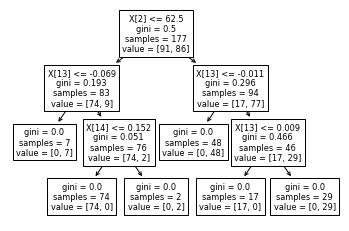

In [48]:
from sklearn import tree
tree.plot_tree(classifier)
plt.show()

In [49]:
#Create Decision Tree classifer object
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=3)
# Train Decision Tree Classifer
classifier = classifier.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = classifier.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


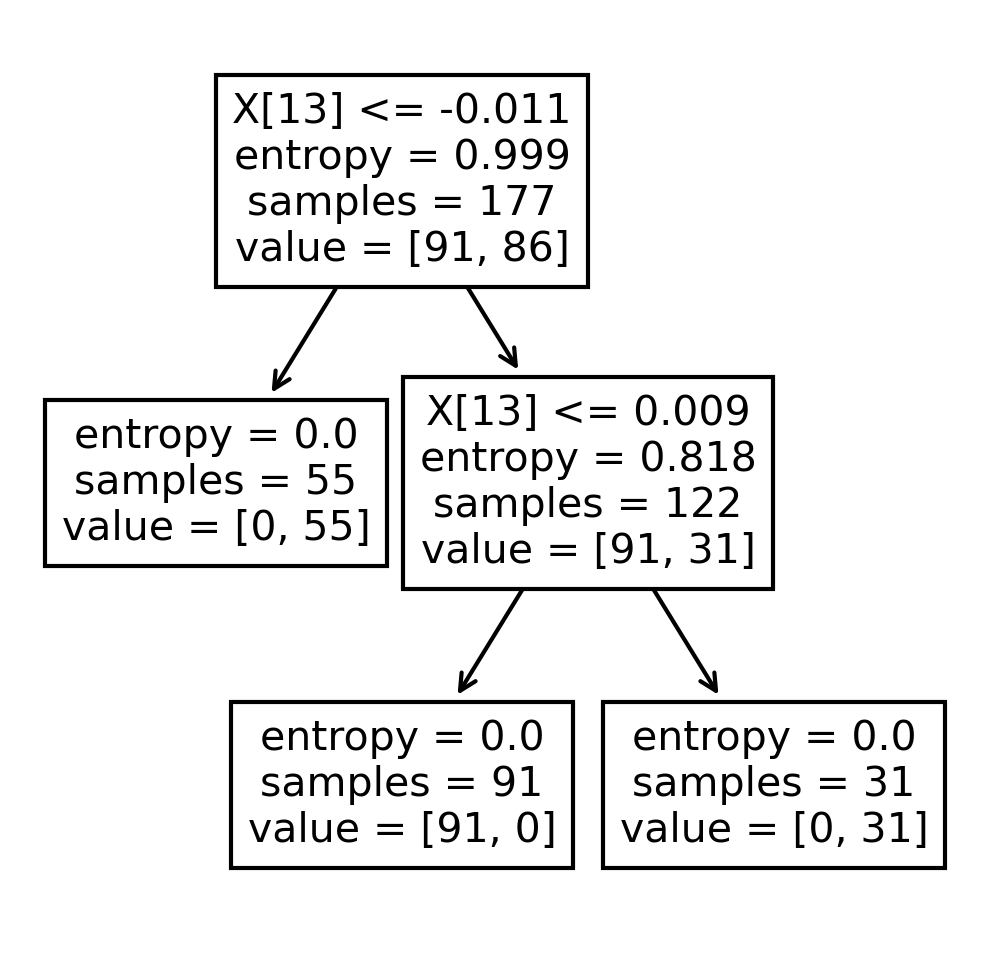

In [50]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(classifier)
plt.show()

In [51]:
#Create Decision Tree classifer object
classifier = DecisionTreeClassifier(criterion="gini", max_depth=5)
# Train Decision Tree Classifer
classifier = classifier.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = classifier.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9831932773109243


In [52]:
conda install -c anaconda python-graphviz

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [53]:
import graphviz

In [ ]:
dot_data = tree.export_graphviz(classifier,out_file=None,feature_names=feature_cols)
graph = graphviz.Source(dot_data)
graph